Análisis teniendo en cuenta las ventanas

In [1]:
%cd ~/work/nbs_pipeline

/home/macu/work/nbs_pipeline


In [2]:
import pandas as pd
import numpy as np
import ydata_profiling as ydp
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [3]:
#file_errors_small  = 'errors_small_03022025_2.csv'
#file_results_small = 'results_small_03022025_2.csv'
#file_errors_small  = 'errors_small_04022025_1.csv'
#file_results_small = 'results_small_04022025_1.csv'
#file_errors_small  = 'errors_small_06022025_1.csv'
#file_results_small = 'results_small_06022025_1.csv'
file_errors_small  = 'errors_small_07022025_1.csv'
file_results_small = 'results_small_07022025_1.csv'
file_errors_small  = 'errors_window_mix.csv'
file_results_small = 'results_window_mix.csv'

In [4]:
results_small = pd.read_csv(file_results_small, index_col=None, header=0)
errors_small  = pd.read_csv(file_errors_small, index_col=None, header=0)

In [5]:
! tail 'errors_small_04022025_1.csv'

model_size,n_epochs,dataset_percent,masked_percent,n_windows,windows,error


In [6]:
print("----- ERRORS -----")
print(f"Total error cases: {len(errors_small)}")
display(errors_small.head())
print(f"Total results: {len(results_small)}")
display(results_small.tail())

----- ERRORS -----
Total error cases: 0


,model_size,n_epochs,dataset_percent,masked_percent,n_windows,windows,error,window


Total results: 256


,model_size,n_epochs,dataset_percent,masked_percent,n_windows,time,first_train_loss,first_mse,first_rmse,first_mae,...,last_mae,last_smape,windows,best_epochs,train_losses,eval_pre,eval_post,full_result,first_eval_loss,last_eval_loss
251,small,100,0.15,0.50,6,49.553974,0.000062,NaN,NaN,NaN,...,NaN,NaN,set(),[6],"[6.188946281326935e-05, 6.196666799951345e-05,...","{'loss': [0.003917228692444041], 'mse': [nan],...","{'loss': [0.004599667679738357], 'mse': [nan],...","([[6.188946281326935e-05, 6.196666799951345e-0...",0.003917,0.004600
252,small,100,0.15,0.75,1,0.077119,NaN,NaN,NaN,NaN,...,NaN,NaN,set(),[-1],"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","{'loss': [0.0019672255642944948], 'mse': [nan]...","{'loss': [0.001944666262716055], 'mse': [nan],...","([[nan, nan, nan, nan, nan, nan, nan, nan, nan...",0.001967,0.001945
253,small,100,0.15,0.75,2,0.078282,NaN,NaN,NaN,NaN,...,NaN,NaN,set(),[-1],"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","{'loss': [0.004078118462348357], 'mse': [nan],...","{'loss': [0.0016906969220144674], 'mse': [nan]...","([[nan, nan, nan, nan, nan, nan, nan, nan, nan...",0.004078,0.001691
254,small,100,0.15,0.75,4,0.077379,NaN,NaN,NaN,NaN,...,NaN,NaN,set(),[-1],"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","{'loss': [0.009201496174292905], 'mse': [nan],...","{'loss': [0.007573214430262202], 'mse': [nan],...","([[nan, nan, nan, nan, nan, nan, nan, nan, nan...",0.009201,0.007573
255,small,100,0.15,0.75,6,49.774204,0.000068,NaN,NaN,NaN,...,NaN,NaN,set(),[5],"[6.80843077134341e-05, 6.693483737763017e-05, ...","{'loss': [0.004720058531448659], 'mse': [nan],...","{'loss': [0.005375734827895131], 'mse': [nan],...","([[6.80843077134341e-05, 6.693483737763017e-05...",0.004720,0.005376


In [7]:
import json

In [8]:
def safe_eval(x, key):
    # Si ya es un diccionario, devolverlo
    if isinstance(x, dict):
        return x
    
    # Si es una cadena que empieza y termina con { }, intentamos convertirla
    if isinstance(x, str) and x.startswith("{") and x.endswith("}"):
        # Reemplazamos:
        # - comillas simples por dobles, para formar un JSON válido
        # - 'nan' por 'null', en caso de que aparezca
        x_mod = x.replace("'", '"').replace("nan", "null")
        try:
            return json.loads(x_mod)[key]
        except json.JSONDecodeError as e:
            print("Error al parsear JSON:", x)
            print("Detalles del error:", e)
    
    # Si no es válido, devolver np.nan
    return np.nan

results_small["eval_pre"].apply(lambda x: safe_eval(x,'loss'))

0                        [0.0]
1                        [0.0]
2                        [0.0]
3                        [0.0]
4      [0.0019205522228730842]
                ...           
251     [0.003917228692444041]
252    [0.0019672255642944948]
253     [0.004078118462348357]
254     [0.009201496174292905]
255     [0.004720058531448659]
Name: eval_pre, Length: 256, dtype: object

In [9]:
eval_pre = results_small["eval_pre"].apply(lambda x: safe_eval(x,'loss'))
eval_post = results_small["eval_post"].apply(lambda x: safe_eval(x, 'loss'))

In [10]:
eval_pre[:3]

0    [0.0]
1    [0.0]
2    [0.0]
Name: eval_pre, dtype: object

In [11]:
eval_post[:3]

0    [0.0]
1    [0.0]
2    [0.0]
Name: eval_post, dtype: object

In [12]:
def improvement_percentage(pre, post):
    return [(pre_val-p)*100 / pre_val if pre_val != 0 else np.nan for pre_val, p in zip(pre, post)]

In [13]:
improvements = [improvement_percentage(pre, post) for pre, post in zip(eval_pre, eval_post)]

In [14]:
mean_improvements = [np.nanmean(np.array(x)) for x in improvements]

/tmp/ipykernel_354/677145521.py:1: RuntimeWarning: Mean of empty slice
  mean_improvements = [np.nanmean(np.array(x)) for x in improvements]


In [64]:
mean_improvements[:10]

[nan,
 nan,
 nan,
 nan,
 -0.13297929429469021,
 -172.85448597001283,
 -4.650010239009489,
 16.32080394321999,
 -4.686971357097995,
 31.145179877289827]

In [16]:
from copy import deepcopy

In [69]:
def aux(x):
    try:
        return ast.literal_eval(x)[0]
    except:
        return x[0]
results_small["best_epoch"] =  results_small["best_epochs"].apply(lambda x: aux(x))

In [70]:
results_small["best_epoch"]

0     -1
1     -1
2     -1
3      0
4     -1
      ..
251    6
252   -1
253   -1
254   -1
255    5
Name: best_epoch, Length: 256, dtype: int64

In [71]:
profile_small_df = results_small[[
    "time", 
    "best_epoch", 
    "dataset_percent", 
    "masked_percent", 
    "n_windows", 
]].copy()
profile_small_df["improvement"] = deepcopy(mean_improvements)

In [72]:
def get_pos(x, pos, pos2 = None): 
    try:
        return x[pos][pos2]
    except:
        try:
            return x[pos]
        except:
            return x

In [75]:
def aux(x):
    try: 
        return get_pos(ast.literal_eval(x),-1)
    except:
        return get_pos(x,-1)
results_small["last_best_epoch"] = results_small["best_epochs"].apply(
    lambda x: aux(x)
)
results_small["last_best_epoch"][:3]

0   -1
1   -1
2   -1
Name: last_best_epoch, dtype: int64

<Axes: title={'center': 'Improvement per case'}>

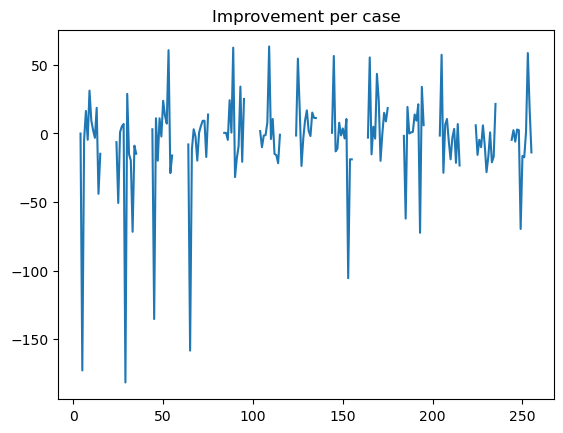

In [76]:
profile_small_df['improvement'].plot(title = "Improvement per case")

In [77]:
display(profile_small_df.sort_values('improvement', ascending = False)[:5])

,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
109,0.072412,-1,0.20,0.50,2,63.345839
89,0.076227,-1,0.15,0.50,2,62.508870
53,1.425529,0,0.25,0.75,2,60.622412
253,0.078282,-1,0.15,0.75,2,58.542231
205,50.514390,28,0.25,0.25,2,57.307342


In [100]:
display(results_small.iloc[109])

model_size                                                      small
n_epochs                                                           10
dataset_percent                                                   0.2
masked_percent                                                    0.5
n_windows                                                           2
time                                                         0.072412
first_train_loss                                                  NaN
first_mse                                                         NaN
first_rmse                                                        NaN
first_mae                                                         NaN
first_smape                                                     [nan]
last_train_loss                                                   NaN
last_mse                                                          NaN
last_rmse                                                         NaN
last_mae            

In [78]:
profile_small_df[profile_small_df["time"] < 8 ].shape

(147, 6)

In [79]:
display(profile_small_df.sort_values('improvement', ascending = False))

,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
109,0.072412,-1,0.20,0.50,2,63.345839
89,0.076227,-1,0.15,0.50,2,62.508870
53,1.425529,0,0.25,0.75,2,60.622412
253,0.078282,-1,0.15,0.75,2,58.542231
205,50.514390,28,0.25,0.25,2,57.307342
...,...,...,...,...,...,...
239,224.028934,0,0.30,1.00,6,NaN
240,0.077229,-1,0.15,0.00,1,NaN
241,0.076900,-1,0.15,0.00,2,NaN
242,0.078048,-1,0.15,0.00,4,NaN


<Axes: >

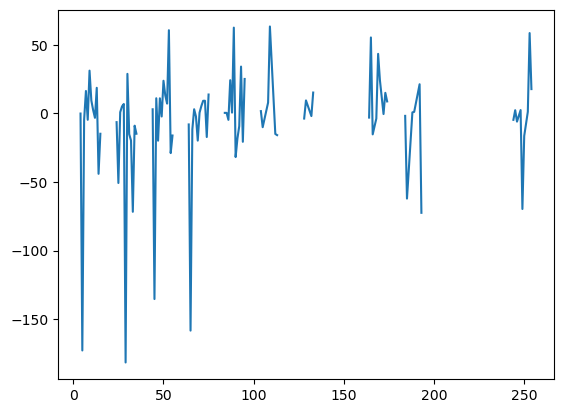

In [80]:
profile_small_df[profile_small_df["time"] < 10]["improvement"].plot()

In [81]:
print("--------------------- Train -----------------")
# Filtrar los 5 mejores loss_percents
display(profile_small_df.sort_values('improvement', ascending = False)[:5])
# Filtrar los 5 mejores loss_percent con dataset percent <= 0.25
display(profile_small_df[profile_small_df['dataset_percent'] < 0.50].sort_values('improvement', ascending = False)[:5])

--------------------- Train -----------------


,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
109,0.072412,-1,0.20,0.50,2,63.345839
89,0.076227,-1,0.15,0.50,2,62.508870
53,1.425529,0,0.25,0.75,2,60.622412
253,0.078282,-1,0.15,0.75,2,58.542231
205,50.514390,28,0.25,0.25,2,57.307342


,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
109,0.072412,-1,0.20,0.50,2,63.345839
89,0.076227,-1,0.15,0.50,2,62.508870
53,1.425529,0,0.25,0.75,2,60.622412
253,0.078282,-1,0.15,0.75,2,58.542231
205,50.514390,28,0.25,0.25,2,57.307342


In [82]:
def plot_correlation(profile, figsize=(8, 6)):
    correlation_matrix = profile.corr()
    # Crear el heatmap con seaborn
    plt.figure(figsize = figsize)  # Ajusta el tamaño si es necesario
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title("Correlation Matrix")
    plt.show()

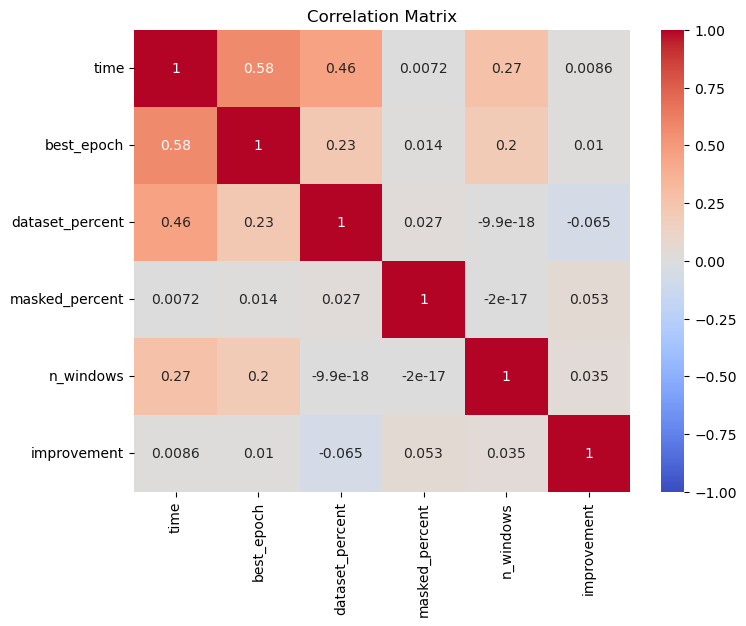

In [83]:
profile_small = ydp.ProfileReport(profile_small_df, title="Pandas Profiling Report for 'df_loss_small'", explorative=True)
plot_correlation(profile_small_df)

Dados los resultados creo que lo que más sentido tiene es hacer la tabla
- 0.25 dataset

In [85]:
results_small["best_epochs"]

0      [-1]
1      [-1]
2      [-1]
3       [0]
4      [-1]
       ... 
251     [6]
252    [-1]
253    [-1]
254    [-1]
255     [5]
Name: best_epochs, Length: 256, dtype: object

In [87]:
 #results_small["best_epochs"] = results_small["best_epochs"].apply(lambda x: ast.literal_eval(x))

In [88]:
results_small["best_epochs"][0][0]

-1

In [89]:
all_epochs = [epoch for sublist in results_small["best_epochs"] for epoch in sublist]
print("pre")
print(all_epochs)
all_epochs = [x for x in all_epochs if isinstance(x, int)]
print("post")
print(all_epochs)

pre
[-1, -1, -1, 0, -1, -1, -1, 0, -1, -1, -1, 0, -1, -1, -1, 0, -1, -1, -1, 0, -1, -1, 0, 0, -1, -1, 0, 0, -1, -1, 0, 0, -1, -1, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, 0, -1, -1, -1, 1, -1, -1, -1, 5, -1, -1, -1, 0, -1, -1, -1, 0, -1, -1, 0, 0, -1, -1, 8, 0, -1, -1, 4, 4, -1, -1, 6, 9, -1, -1, 0, 0, 0, 0, 0, 0, 5, 5, 2, 5, 3, 1, 8, 7, 2, 0, 3, 9, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 9, 9, 4, 0, 7, 1, 5, 1, 5, 7, 0, 0, 0, 0, -1, -1, -1, 0, -1, -1, -1, 25, -1, -1, -1, 19, -1, -1, -1, 11, -1, -1, -1, 0, -1, -1, 0, 0, -1, -1, 22, 16, -1, -1, 22, 44, -1, -1, 0, 43, -1, -1, 0, 0, 0, 0, 0, 0, 6, 28, 39, 10, 14, 19, 39, 45, 6, 49, 44, 45, 0, 0, 0, 0, 0, 0, 0, 0, 36, 44, 9, 26, 5, 25, 44, 33, 29, 45, 22, 29, 0, 0, 0, 0, -1, -1, -1, 0, -1, -1, -1, 48, -1, -1, -1, 6, -1, -1, -1, 5]
post
[-1, -1, -1, 0, -1, -1, -1, 0, -1, -1, -1, 0, -1, -1, -1, 0, -1, -1, -1, 0, -1, -1, 0, 0, -1, -1, 0, 0, -1

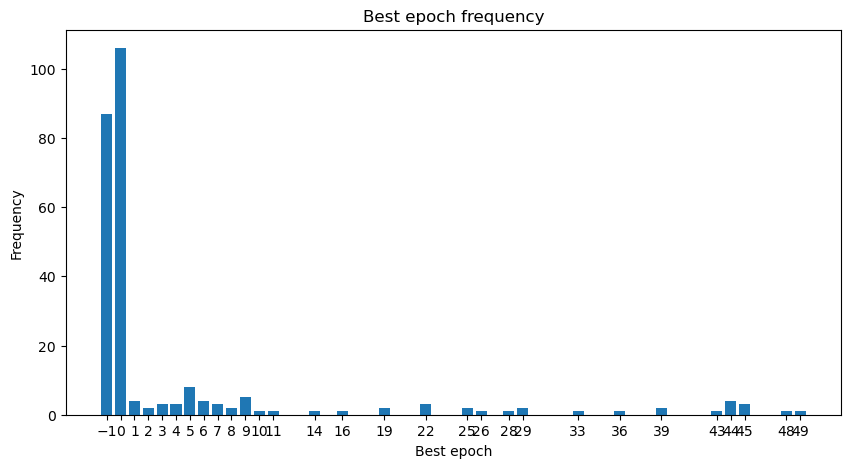

In [90]:

epoch_counts = pd.Series(all_epochs).value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(epoch_counts.index, epoch_counts.values)
plt.xlabel("Best epoch")
plt.ylabel("Frequency")
plt.title("Best epoch frequency")
plt.xticks(epoch_counts.index)  # Asegurar que se muestren todas las épocas en el eje X
plt.show()

## Sklearn feature relevance analysis

In [34]:
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np
import pandas as pd

def select_k_best_features(df, target_column, k='all'):
    """
    Select the best features using SelectKBest and f_regression.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with numerical features.
    target_column (str): The name of the target variable.
    k (int or 'all', optional): Number of best features to select (default 'all').
    
    Returns:
    pd.DataFrame: Feature importance scores sorted in descending order.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    selector = SelectKBest(score_func=f_regression, k=k)
    selector.fit(X, y)
    
    scores = selector.scores_
    feature_importance = scores / np.sum(scores)  # Normalize scores
    
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'SelectKBest_Score': scores,
        'SelectKBest_Percentage': feature_importance * 100
    })
    
    return importance_df.sort_values(by='SelectKBest_Percentage', ascending=False)


2️⃣ Obtener la importancia de características con RandomForest

In [35]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_feature_importance(df, target_column):
    """
    Compute feature importance using a RandomForestRegressor.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with numerical features.
    target_column (str): The name of the target variable.
    
    Returns:
    pd.DataFrame: Feature importance scores sorted in descending order.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    rf_importances = model.feature_importances_
    
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'RandomForest_Importance': rf_importances * 100
    })
    
    return importance_df.sort_values(by='RandomForest_Importance', ascending=False)


3️⃣ Análisis combinado de importancia de características

In [36]:
def analyse_feature_importance(df, target_column, k='all'):
    """
    Analyse feature importance using both SelectKBest and RandomForestRegressor.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with numerical features.
    target_column (str): The name of the target variable.
    k (int or 'all', optional): Number of best features to select (default 'all').
    
    Returns:
    pd.DataFrame: Combined feature importance scores sorted in descending order.
    """
    k_best_df = select_k_best_features(df, target_column, k)
    rf_df = random_forest_feature_importance(df, target_column)
    
    combined_df = pd.merge(k_best_df, rf_df, on='Feature', how='outer')
    return combined_df.sort_values(by='RandomForest_Importance', ascending=False)


In [37]:
results_small["best_epochs"][0][0]

-1

In [91]:
df = profile_small_df[["masked_percent", "n_windows", "dataset_percent", "improvement"]].copy()
df["best_epoch"] = results_small["best_epochs"].apply(lambda x: x[0])
df_feat = df [ df [ "masked_percent" ]  < 1 ]
df_feat = df_feat [ df_feat [ "masked_percent" ]  > 0 ]
df_feat = df_feat [ df_feat [ "dataset_percent" ]  < 1 ]
df_feat[:5]

,masked_percent,n_windows,dataset_percent,improvement,best_epoch
4,0.25,1,0.15,-0.132979,-1
5,0.25,2,0.15,-172.854486,-1
6,0.25,4,0.15,-4.650010,-1
7,0.25,6,0.15,16.320804,0
8,0.50,1,0.15,-4.686971,-1


In [49]:
df_feat[pd.isna(df_feat["improvement"])]

,masked_percent,n_windows,dataset_percent,improvement,best_epoch


In [50]:
result = analyse_feature_importance(df_feat, target_column="improvement")
display(result)

,Feature,SelectKBest_Score,SelectKBest_Percentage,RandomForest_Importance
2,n_windows,0.189488,14.612176,35.516769
3,best_epoch,0.015473,1.193178,27.201454
1,masked_percent,0.440676,33.982311,19.396553
0,dataset_percent,0.651144,50.212335,17.885224


In [92]:
def count_epoch(df):
    all_epochs = df["best_epoch"]
    print(all_epochs.unique)
    epoch_counts = pd.Series(all_epochs).value_counts().sort_index()
    plt.figure(figsize=(10, 5))
    plt.bar(epoch_counts.index, epoch_counts.values)
    plt.xlabel("Best epoch")
    plt.ylabel("Frequency")
    plt.title("Best epoch frequency")
    plt.xticks(epoch_counts.index)  # Asegurar que se muestren todas las épocas en el eje X
    plt.show()

<bound method Series.unique of 4     -1
5     -1
6     -1
7      0
8     -1
      ..
251    6
252   -1
253   -1
254   -1
255    5
Name: best_epoch, Length: 156, dtype: int64>


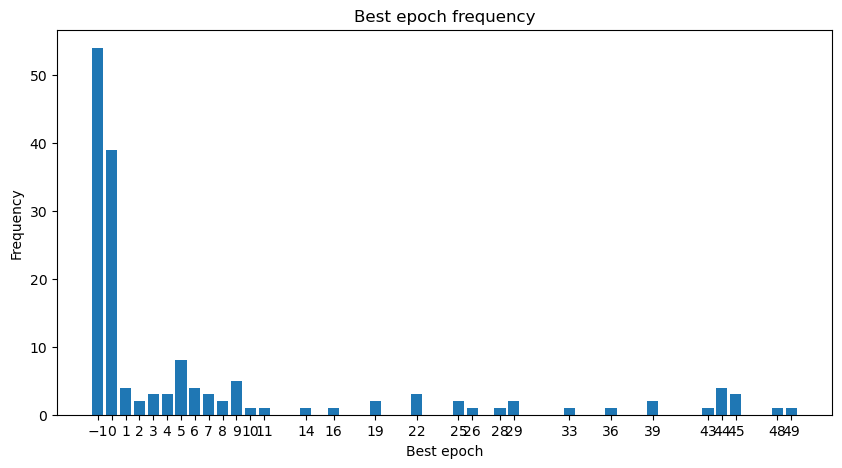

In [59]:
count_epoch(df_feat)

# Best option

In [60]:
def best_combination_for_improvement(df, target_column, importance_df):
    """
    A partir del análisis de importancia (importance_df), selecciona las dos variables 
    más relevantes (según el promedio de SelectKBest_Percentage y RandomForest_Importance). 
    Para cada una, obtiene el valor que da mayor improvement (promedio del target).
    Luego, filtra el DataFrame a esos casos y, en ese subconjunto, para cada variable restante,
    obtiene el valor que maximiza el improvement.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame de entrada.
    target_column : str
        Nombre de la variable objetivo (por ejemplo, "improvement").
    importance_df : pd.DataFrame
        DataFrame resultante de analyse_feature_importance, que debe contener las columnas 
        'Feature', 'SelectKBest_Percentage' y 'RandomForest_Importance'.
    
    Returns:
    --------
    best_values : dict
        Diccionario con para cada variable (tanto las top2 como las restantes) el valor óptimo.
    avg_impr : float or None
        Promedio de improvement en el subconjunto filtrado (puede ser None si no hay casos).
    """
    # Calcular la importancia promedio de cada feature
    importance_df = importance_df.copy()
    importance_df["AvgImportance"] = (importance_df["SelectKBest_Percentage"] + importance_df["RandomForest_Importance"]) / 2
    
    # Ordenar y seleccionar las dos variables más relevantes
    top_features = importance_df.sort_values(by="AvgImportance", ascending=False)["Feature"].tolist()
    top2 = top_features[:2]
    
    best_values = {}
    
    # Para cada una de las dos variables más importantes, obtener el valor que genera mayor improvement.
    for feat in top2:
        # Agrupamos por la variable y calculamos el promedio de improvement para cada valor
        grouped = df.groupby(feat)[target_column].mean().reset_index()
        # Seleccionamos el valor cuyo promedio de improvement es mayor
        best_row = grouped.loc[grouped[target_column].idxmax()]
        best_values[feat] = best_row[feat]
    
    # Filtrar el DataFrame a los casos en que las dos variables toman esos valores
    filtered_df = df.copy()
    for feat, val in best_values.items():
        filtered_df = filtered_df[filtered_df[feat] == val]
    
    # Para el resto de las variables (excluyendo las dos top y el target), buscar el valor que dentro
    # del subconjunto filtrado genere el mayor improvement
    remaining_features = [feat for feat in df.columns if feat not in top2 and feat != target_column]
    for feat in remaining_features:
        grouped = filtered_df.groupby(feat)[target_column].mean().reset_index()
        if len(grouped) > 0:
            best_row = grouped.loc[grouped[target_column].idxmax()]
            best_values[feat] = best_row[feat]
        else:
            best_values[feat] = None  # En caso de no haber datos suficientes
    
    # También se puede obtener el improvement promedio en los casos filtrados por las dos variables top
    if len(filtered_df) > 0:
        avg_impr = filtered_df[target_column].mean()
    else:
        avg_impr = None
    
    return best_values, avg_impr


In [61]:
feature_importance = analyse_feature_importance(df_feat, target_column="improvement")
display(feature_importance)
best_vals, avg_improvement = best_combination_for_improvement(df_feat, target_column="improvement", importance_df=feature_importance)

print("Mejor combinación de valores:")
for feat, val in best_vals.items():
    print(f"{feat}: {val}")

print(f"\nImprovement promedio en el subconjunto de las top2: {avg_improvement}")


,Feature,SelectKBest_Score,SelectKBest_Percentage,RandomForest_Importance
2,n_windows,0.189488,14.612176,35.516769
3,best_epoch,0.015473,1.193178,27.201454
1,masked_percent,0.440676,33.982311,19.396553
0,dataset_percent,0.651144,50.212335,17.885224


Mejor combinación de valores:
dataset_percent: 0.25
masked_percent: 0.5
n_windows: 4.0
best_epoch: 8.0

Improvement promedio en el subconjunto de las top2: 4.359225215298742


In [62]:
final = df_feat[ df_feat["n_windows"] == 4].copy()
final = final[ final["dataset_percent"] == 0.25]
final = final[ final ["masked_percent"] == 0.5]
final = final [ final [ "best_epoch" ] == 8]

In [63]:
final

,masked_percent,n_windows,dataset_percent,improvement,best_epoch
130,0.5,4,0.25,16.747646,8
